In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset, 'r') as zip :
  zip.extractall()
  print('Done')

Done


In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
import nltk # natural language toolkit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
import numpy as np
import pandas as pd
import re

Data Processing

In [ ]:
#load data from csv to pandas
data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding = 'ISO-8859-1')

In [ ]:
# checking the number of rows and columns
data.shape

(1599999, 6)

In [ ]:
data.sample(10)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
994147,4,1835502006,Mon May 18 06:08:15 PDT 2009,NO_QUERY,SShayler,@todayinsf Yep I definitely caught it. Thanks...
1297307,4,2004476573,Tue Jun 02 08:15:39 PDT 2009,NO_QUERY,niiknacks,Wait. Try for her license again* Oops
1014826,4,1881489126,Fri May 22 04:48:14 PDT 2009,NO_QUERY,Adickted_,Good morning world Last night was full of wor...
1480835,4,2066957248,Sun Jun 07 11:29:09 PDT 2009,NO_QUERY,afrequentflyer,"@Janneke8 lmao i am so stupid, i just read she..."
92044,0,1759845536,Sun May 10 20:05:24 PDT 2009,NO_QUERY,proconcert,Hiccups. Just what I need before retiring to m...
488110,0,2182468405,Mon Jun 15 13:12:37 PDT 2009,NO_QUERY,graemesmith1978,"@KerronCross re: Broad ... sometimes, and yep ..."
7538,0,1469866330,Tue Apr 07 07:39:05 PDT 2009,NO_QUERY,jukester,Back after spending a couple of days with my s...
992022,4,1835194030,Mon May 18 05:23:28 PDT 2009,NO_QUERY,KristenSousa,@Rokkster - argh! of all days to leave my iPod...
1483415,4,2067469579,Sun Jun 07 12:24:00 PDT 2009,NO_QUERY,protesss,@kerrymarieuk87 its where I'm staying in tener...
1208400,4,1988816362,Sun May 31 23:27:32 PDT 2009,NO_QUERY,benlucier,"@Mcfixit Ok, done. My friends are backing away..."


In [ ]:
# naming the columns and reading the daaset again

col_names = ['target','id','date','flag','user','text']
data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding = 'ISO-8859-1', names = col_names)

In [ ]:
data.shape

(1600000, 6)

In [ ]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# counting the number of missing values
data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
data = data.sample(n=100000)

In [ ]:
data.duplicated().sum() # no duplicate values

0

In [ ]:
#checking the distribution of target column
data['target'].value_counts() # almost equal distribution

target
0    50107
4    49893
Name: count, dtype: int64

convert the target for positive tweets, 4 to 1

In [ ]:
data.replace({'target':{4:1}}, inplace = True) # in the form of a dictionary

In [ ]:
data['target'].value_counts() # no neutral tweets in the data

target
0    50107
1    49893
Name: count, dtype: int64

0 -> negative tweet

1 -> positive tweet

STEMMING


In [ ]:
# for example nothing to do with code
!pip install emoji # for example nothing to do with code
import emoji

text = "Hello 😊! I hope you're having a great day 🌞."
text = emoji.demojize(text)

print(text)

Hello :smiling_face_with_smiling_eyes:! I hope you're having a great day :sun_with_face:.


In [ ]:
p_stem = PorterStemmer()
import string

In [ ]:
dict ={}
with open('/content/slang.txt', 'r') as file:
  for line in file:
    line = line.strip()
    if line:  # Check if the line is not empty
      key, value = line.split('=', 1)  # Split on the first symbol
      dict[key] = value

print(dict)

{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'B4N': 'Bye For Now', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': ' I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh My A.. Off', 'LOL': 'Laughing

In [ ]:
def chat(text): # function to convert slangs into their full forms
  new_txt = []
  for w in text.split():
    if w.upper() in dict.keys():
      new_txt.append(dict[w.upper()])
    else:
      new_txt.append(w)
  return ' '.join(new_txt)

In [ ]:
data['text'].apply(chat)

1210332    @mparaz Apparently so. Oh well. It doesn't mat...
1429866                           Oops that's watching no h.
1507624    So warm in my room.. Birthday in 8 hours! Exam...
714330                                  Got hurt in the pool
28503      is still trying to find a friggin hoodie. Ugh....
                                 ...                        
1433088    @herbstsonne so glad you found a great place!!...
1590479                       @phendo happy Birthday!!! xxxx
212467     @domipheus Good for you! I tried to here, but ...
697492     @QueenM81 i got the couple of pics they ahd bu...
809872     @DonnieWahlberg I got sad news today, but I wa...
Name: text, Length: 100000, dtype: object

In [ ]:
# rectifying any spelling errors
# from textblob import TextBlob

# def spelling(text):
#   tb = TextBlob(text)
#   return str(tb.correct())

In [ ]:
# data['text'].apply(spelling)

In [ ]:
# from nltk.tokenize import word_tokenize

In [ ]:
def stemming(content):
  content = emoji.demojize(content)
  # content = content.translate(str.maketrans('','',string.punctuation))
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content) # if any word or letter doesnt belong to this a-z then we will remove it
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [p_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  # reducing the word to its root form or stemmed form and then checking if it belongs to the list of stopwords
  # if it does not then we add it to the list
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
data['stemmed_content'] = data['text'].apply(stemming)

In [ ]:
# import string

# def remove_punctuation(text):
#     return text.translate(str.maketrans('', '', string.punctuation))

# # Apply the function to the 'text' column
# data['stemmed_content'] = data['stemmed_content'].apply(remove_punctuation)

# # Display the DataFrame
# print(data['stemmed_content'])

In [ ]:
X = data['stemmed_content'].values
Y = data['target'].values

In [ ]:
print(X)
Y

['mparaz appar oh well matter long lotu note job help job fine'
 'oop watch h' 'warm room birthday hour exam ish hour hmm' ...
 'domipheu good tri holiday peopl went mental got yum stuff got work'
 'queenm got coupl pic ahd dont think kean today'
 'donniewahlberg got sad news today advis life throw lemon add black rum']


array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
# Splitting into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)
# stratify to make sure equal proportion of data goes into training data and testing data i.e. 50-50
# random state so that data is split in the same way for everyone

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(100000,) (80000,) (20000,)


In [ ]:
# Applying BoW
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# X_train_bow = cv.fit_transform(X_train).toarray()
# X_test_bow = cv.transform(X_test).toarray()

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()

# rf.fit(X_train_bow,Y_train)
# y_pred = rf.predict(X_test_bow)
# accuracy_score(Y_test,y_pred)

Vectorization

In [ ]:
vectorizer = TfidfVectorizer()
#fitting and transforming training data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
# gives importance to each word on the basis of whether it is a positive tweet or a negative tweet

In [ ]:
print(X_train)

  (0, 60033)	0.3783615145488311
  (0, 57833)	0.3222152890373072
  (0, 49062)	0.8677671760437354
  (1, 2950)	0.3517274624742293
  (1, 60244)	0.4013819291268921
  (1, 48055)	0.3703631971519182
  (1, 60547)	0.25223449998652664
  (1, 39262)	0.3375751331102591
  (1, 39630)	0.22930109030982382
  (1, 59785)	0.5529052675612675
  (1, 57833)	0.20530222335642306
  (2, 25294)	0.4086344755671258
  (2, 59054)	0.502429984064583
  (2, 18135)	0.3150006030702851
  (2, 62337)	0.6937986714863323
  (3, 11417)	0.29600217771007953
  (3, 14343)	0.4550042328380358
  (3, 59303)	0.2595438922602053
  (3, 33429)	0.2480004919500512
  (3, 13706)	0.2318491828083843
  (3, 18875)	0.468982668464277
  (3, 50927)	0.3197841574383188
  (3, 12026)	0.32867542185859
  (3, 64182)	0.30413542329375154
  (4, 24030)	0.38622803756103585
  :	:
  (79997, 17248)	0.4326602022966331
  (79997, 20198)	0.44407567283960275
  (79997, 19890)	0.2850612666167281
  (79997, 48675)	0.32326642007997114
  (79997, 18832)	0.3366179260425833
  (79997, 4

In [ ]:
print(X_test)

  (0, 49008)	0.6253827928544886
  (0, 47924)	0.5615800788141654
  (0, 38109)	0.5417787163414558
  (1, 59443)	0.5800914158011764
  (1, 12073)	0.8145513791737061
  (2, 60404)	0.32544813441752507
  (2, 58187)	0.3439603316354995
  (2, 52993)	0.28760121067505584
  (2, 47676)	0.42366001765491856
  (2, 34512)	0.16383030301467055
  (2, 30612)	0.23605055203253755
  (2, 15136)	0.38980129979285827
  (2, 6774)	0.45836325072586453
  (2, 1671)	0.2626221256621342
  (3, 63121)	0.40749340966707026
  (3, 45673)	0.581145631090691
  (3, 34512)	0.20771574659719416
  (3, 32431)	0.3702913451418054
  (3, 27258)	0.37336495735128916
  (3, 18150)	0.30209360555157666
  (3, 5593)	0.29205380836015304
  (4, 62532)	0.3247501589641563
  (4, 60033)	0.242893218515485
  (4, 51442)	0.21479256603814287
  (4, 51131)	0.5042979709755641
  :	:
  (19996, 56438)	0.5044039113894155
  (19996, 54836)	0.43029190131517764
  (19996, 49182)	0.4706036348103234
  (19996, 26702)	0.4443202835814972
  (19996, 23164)	0.37621440474681134
  (1

Training the ML Model

In [ ]:
model = LogisticRegression(max_iter = 1000 )

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [ ]:
acc_score_train = model.score(X_train,Y_train)

In [ ]:
acc_score_train

0.8280125

In [ ]:
acc_score_test = accuracy_score(Y_test, model.predict(X_test))

In [ ]:
acc_score_test

0.75615

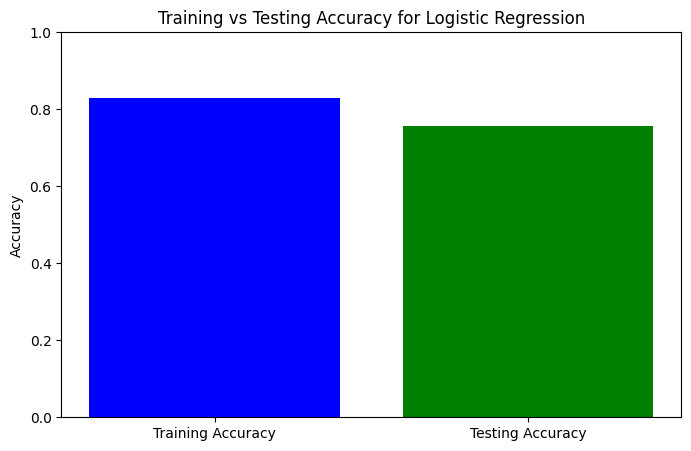

In [ ]:
# Plot the accuracy scores
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [acc_score_train, acc_score_test], color=['blue', 'green'])
plt.title('Training vs Testing Accuracy for Logistic Regression')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

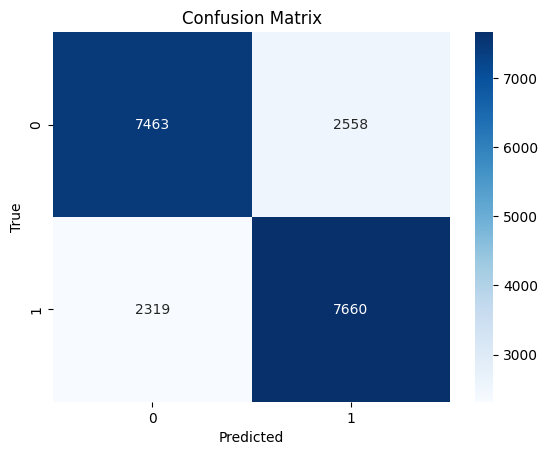

In [ ]:
import seaborn as sns
cm = confusion_matrix(Y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
str = ['Spread kindness!']
x = model.predict(vectorizer.transform(str))
if x[0] == 1:
  print('Positive tweet')
else:
  print('Negative tweet')

Positive tweet


Saving the Trained Model


In [ ]:
import pickle

In [ ]:
file = 'trained.pkl'
pickle.dump(model,open(file,'wb'))

In [ ]:
load_model = pickle.load(open('/content/trained.pkl','rb'))